The accuracy under kernel linear is 0.4044
Time elapsed: 00:00:022914
The accuracy under kernel poly is 0.1004
Time elapsed: 00:00:017303
The accuracy under kernel rbf is 0.0204
Time elapsed: 00:00:046381


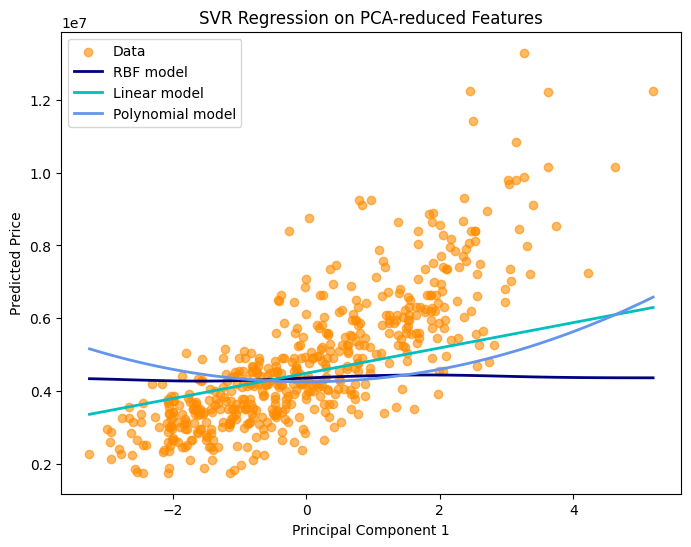

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from time import time
import datetime

# Load and preprocess dataset
url = "https://drive.google.com/uc?export=download&id=1r0gkZL9150nrhZOtz9fIbVGKMqe45fbG"
housing = pd.read_csv(url)

# Convert 'yes'/'no' columns to binary
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
def binary_map(x):
    return x.map({'yes': 1, "no": 0})
housing[varlist] = housing[varlist].apply(binary_map)

# Select features and target
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
            'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
            'parking', 'prefarea']
X = housing[features].values
Y = housing['price'].values

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_scaled)

# Split data
X_train, X_test, Y_train, Y_test = train_test_split(X_pca, Y, test_size=0.2, random_state=100)

# Fit SVR models
kernels = ["linear", "poly", "rbf"]
models = {}

for kernel in kernels:
    start = time()
    svr = SVR(kernel=kernel, C=1e3, gamma='auto', degree=2)
    svr.fit(X_train, Y_train)
    acc = svr.score(X_test, Y_test)
    print(f"The accuracy under kernel {kernel} is {acc:.4f}")
    print("Time elapsed:", datetime.datetime.fromtimestamp(time()-start).strftime("%M:%S:%f"))
    models[kernel] = svr

# Plot predictions
pc_range = np.linspace(X_pca.min(), X_pca.max(), 100).reshape(-1, 1)

y_lin = models['linear'].predict(pc_range)
y_poly = models['poly'].predict(pc_range)
y_rbf = models['rbf'].predict(pc_range)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca, Y, color='darkorange', label='Data', alpha=0.6)
plt.plot(pc_range, y_rbf, color='navy', lw=2, label='RBF model')
plt.plot(pc_range, y_lin, color='c', lw=2, label='Linear model')
plt.plot(pc_range, y_poly, color='cornflowerblue', lw=2, label='Polynomial model')
plt.xlabel('Principal Component 1')
plt.ylabel('Predicted Price')
plt.title('SVR Regression on PCA-reduced Features')
plt.legend()
plt.show()
